# <font color=darkviolet><center> Implementação de Filtro Gaussiano
##  <font color=hotpink><center> Eloisa Maria, Giovana Martins, Maria Clara, Rafaela Luz
    
    

## <font color=lightgreen> Introdução
    
<font color=black> A finalidade deste caderno é demonstrar a implementação de um filtro Gaussiano, além de realizar uma comparação com um filtro linear. Para que seja possível a realização dessa tarefa é necessário que as imagens que desejamos aplicar os filtros estejam na forma matricial, tendo isso em vista, implementaremos uma função que realiza esse processo.

## <font color=lightgreen> Bibliotecas
As bibliotecas a serem utilizadas são as seguintes: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

## <font color=lightgreen> Convertendo imagens em matrizes
Para essa etapa do trabalho foi criada a função a seguir, ela recebe uma imagem em formato PPM, realiza a leitura do arquivo e armazena os dados em um `nparray`.
-  <font color=dakgreen>Por que usar esse formato de arquivo e o que ele significa?
    
    
<font color=black> PPM ou Mapa de Pixels Portátil (Portable Pixmap) é um formato de arquivo que armazena imagens coloridas no formato matricial. Um arquivo em PPM pode estar no modo texto('P3') ou modo binário('P6'), o modo texto armazena os números em ASCII(American Standard Code for Information Interchange) enquanto o binário armazena em bytes compactos,sendo mais eficiente. O modo em que o arquivo se encotra é descrito em sua primeira linha, a segunda linha armazena as dimensões da imagem. O arquivo em si comporta as informações de cor contidas em cada pixel da imagem individualmente, utilizando o sistema RGB. Na terceira linha do arquivo o maior valor desses pixels é armazenado, e em seguida os códigos RGB são dispostos em formato matricial seguindo a imagem, como um verdadeiro mapa.
<font color=black> Esse formato é muito útil por ser fácil de manipular e editar, atualmente ele é muito usado como formato intermediário em imagens pequenas para edições.  
-  <font color=dakgreen>Como a função funciona?
    

<font color=black> Na função o local de armazenamento da imagem é recebido como argumento, então, na linha 2, o código busca arquivo e abre para leitura, o parâmetro `'rb'` indica que ao abrir o arquivo deve ler em binário sem realizar modificações.A linha seguinte checa se o arquivo está no formato adequado para conversão, nesse caso um PPM P6(modo binário). A linha 5 armazena as dimensões da figura em duas variáveis e a linha 6 armazena a cor mais forte presente nela, já a linha 7 armazena os dados RGB da imagem em outra variável. A seguir é usada a função `frombuffer` da biblioteca `Numpy`, ela transforma um buffer de dados binários em array, esse array é reajustado e devolvido pela função.

In [2]:
def converte_matriz(local):
    with open(local, 'rb') as arquivo:
        cabeçalho=arquivo.readline().decode().strip()
        if cabeçalho=='P6':
            largura, altura=map(int,arquivo.readline().decode().strip().split())
            cor_mais_forte=int(arquivo.readline().decode().strip())
            dados_imagem=arquivo.read()
            imagem_array=np.frombuffer(dados_imagem, dtype=np.uint8)
            imagem_array = imagem_array.reshape((altura, largura, 3))
        
        else:
            raise ValueError("Formato de imagem não suportado. Para que o código seja executado utilize uma imagem em formato PPM.")
            
        return imagem_array

Dimensões da imagem: (153, 300, 3)


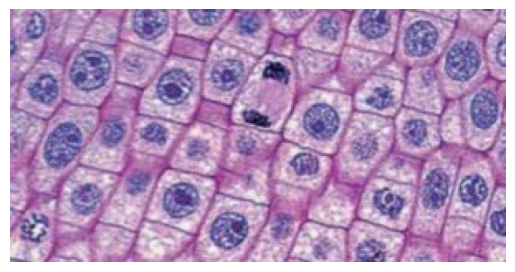

Imagem em forma de array: [[[155 107 157]
  [162 119 165]
  [179 144 186]
  ...
  [194 157 208]
  [197 160 212]
  [168 133 187]]

 [[167 119 169]
  [164 121 167]
  [169 134 176]
  ...
  [198 162 210]
  [193 156 208]
  [161 127 178]]

 [[175 127 177]
  [162 119 165]
  [157 122 162]
  ...
  [194 158 204]
  [180 144 192]
  [140 106 156]]

 ...

 [[161 142 164]
  [171 152 174]
  [178 158 185]
  ...
  [238 213 234]
  [231 201 227]
  [220 187 214]]

 [[132 107 136]
  [128 103 133]
  [119  94 126]
  ...
  [244 219 240]
  [229 199 223]
  [202 169 196]]

 [[165 138 171]
  [166 139 174]
  [156 128 166]
  ...
  [244 219 240]
  [205 175 201]
  [171 138 167]]]


In [3]:
imagem=converte_matriz('imagem para teste 3.ppm')
print("Dimensões da imagem:", imagem.shape)
plt.imshow(imagem)
plt.axis('off')
plt.show()
print("Imagem em forma de array:",imagem)

## <font color=lightgreen> Função de Aplicação de filtro
    
   Para entender o funcionamento dos filtros e realizar testes foi implementada uma função para aplicação de filtros.
    
-  <font color=dakgreen>Como a função funciona?    
    
  
    Essa função recebe como argumentos o array da imagem original e o array-semente do filtro desejado. O primeiro passo é criar uma matriz rezuldado onde serão armazenados os valores obtidos após a aplicação do filtro. A matriz resultado deve ser uma matriz nula com a mesma natureza que a matriz da imagem. Agora é possível aplicar o filtro, para cada uma das dimensões do array é realizada a convolução 2D das matrizes fornecidas utilizando a função `convolve2d` da biblioteca `scipy.signal`. O resultado da convolução é armazenado na matriz resultado já criada e retornado.
    
-  <font color=dakgreen>O que significam os parâmetros utilizados na convolução?
    
    
    A função `convolve2d` possui alguns parâmetros para retornar a convolução ideal para o seu caso. O parâmetro `mode` define o formato de devolução da convolução, no caso estamos utilizando o "same" que indica que desejamos que o resultado tenha o mesmo tamanho que a matriz de imagem fornecida. Já o parâmetro `boundary` diz respeito às bordas da imagem, as opcões nesse caso eram preencher os espaços fora da borda com zeros, interpretar a imagem como uma esfera(bordas contínuas) ou espelhar os valores da borda, a opção utilizada foi a última citada("symm").
    
- <font color=dakgreen> Como funciona a função `convolve2d`?
    
    Ela realiza uma convolução bidimensional (2D) que é uma operação matemática usada para aplicar filtros em imagens, como suavização ou detecção de bordas. Ela funciona deslizando um kernel (matriz pequena) sobre uma matriz maior (imagem), multiplicando os valores correspondentes e somando os resultados para obter um único valor, que é então colocado na posição correspondente da matriz de saída. O kernel continua a se mover pela imagem até cobrir toda a área desejada. Modificações, como o tamanho do kernel, preenchimento (padding) e o passo (stride), podem ajustar o efeito da convolução. Essa técnica é amplamente utilizada no processamento de imagens para extrair ou modificar características específicas.

In [4]:
def aplicar_filtro(imagem_array, semente):
    imagem_resultado=np.zeros_like(imagem_array)
    for i in range(3):
        imagem_resultado[:,:,i]=convolve2d(imagem_array[:,:,i],semente,mode='same',boundary='symm')
    return imagem_resultado

## <font color=lightgreen> Exemplo de aplicação de filtro
    
<font color=black> Para eluciadar o funcionamento do código foi feito um teste com um filtro linear de média.
    
-  <font color=dakgreen> Filtro de média:
    
    Um filtro linear de média é um filtro passa-baixas que funciona substituindo cada valor pela média dele próprio e de seus n vizinhos.
    

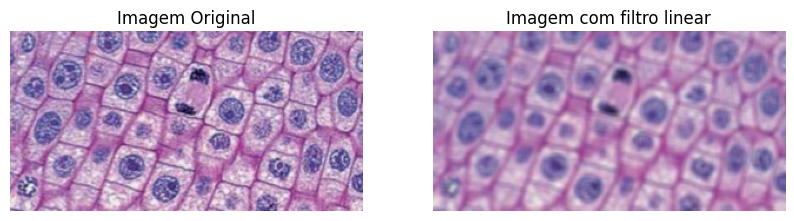

In [5]:
semente_exemplo=np.ones((5, 5)) / 25.0 
imagem_com_filtro=aplicar_filtro(imagem, semente_exemplo)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagem)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro)
axes[1].set_title("Imagem com filtro linear")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Gerando um Kernel Gaussiano
    
A criação de uma semente de fitro gaussiano é relativamente simples, sendo necessária apenas a transcrição da fórmula matemática na forma de código. Para gerar a semente somente são utilizados os parâmetros tamanho e sigma. Dentro da função o parâmetro tamanho é utilizado para calcular o X e o Y e então a semente é definida a partir da fórmula:
    
$$
G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$


In [6]:
def gerar_semente_gaussiana(tamanho,sigma):
    tamanho_semente=tamanho//2
    x=np.linspace(-tamanho_semente,tamanho_semente,tamanho)
    y=np.linspace(-tamanho_semente,tamanho_semente,tamanho)
    x,y=np.meshgrid(x,y)
    semente=np.exp(-(x**2+y**2)/(2*sigma**2))
    semente=semente/np.sum(semente)
    return semente


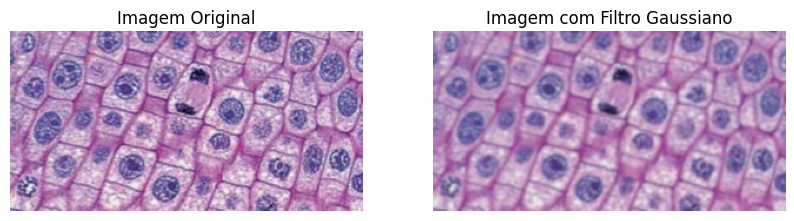

In [7]:
semente_gaussiana_exemplo=gerar_semente_gaussiana(25,1.0)
imagem_com_filtro_g=aplicar_filtro(imagem,semente_gaussiana_exemplo)
fig, axes=plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(imagem)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro_g)
axes[1].set_title("Imagem com Filtro Gaussiano")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Comparando os filtros 

No espaço abaixo foram plotadas simultaneamente as imagens com ambos os filtros para melhor visualização das diferenças observadas nos resultados dos processos de tratamento de imagem.

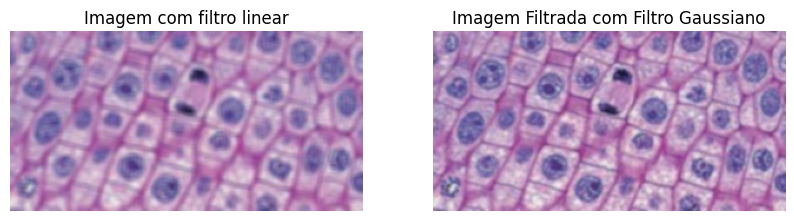

In [8]:
fig, axes=plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(imagem_com_filtro)
axes[0].set_title("Imagem com filtro linear")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro_g)
axes[1].set_title("Imagem Filtrada com Filtro Gaussiano")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Filtro Sobel
    
O filtro de Sobel é uma técnica de detecção de bordas usada em processamento de imagens. Ele calcula a derivada da intensidade dos pixels em uma imagem para identificar variações abruptas, ou seja, bordas. O filtro utiliza duas máscaras de convolução: uma para detectar mudanças horizontais (gradiente em 
𝑥
x) e outra para mudanças verticais (gradiente em 
𝑦
y). Essas máscaras percorrem a imagem e destacam regiões onde a variação da intensidade é maior. O resultado final é obtido combinando os dois gradientes usando a fórmula:

$$   
G = \sqrt{G_x^2 + G_y^2}
$$
Produzindo uma imagem de bordas bem definidas. O método é amplamente utilizado em visão computacional e processamento digital de imagens.

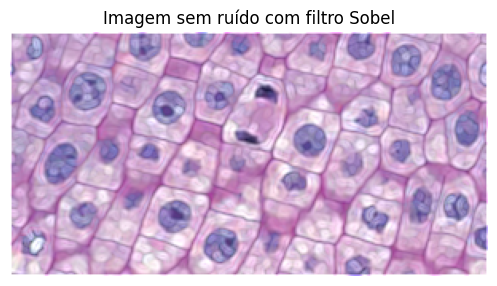

In [9]:
def sobelemimagemcolorida(image):
    sobel_x=np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y=np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]

    grad_x_r=convolve2d(r,sobel_x,boundary='fill',fillvalue=0,mode='same')
    grad_y_r=convolve2d(r,sobel_y,boundary='fill',fillvalue=0,mode='same')

    grad_x_g=convolve2d(g,sobel_x,boundary='fill',fillvalue=0,mode='same')
    grad_y_g=convolve2d(g,sobel_y,boundary='fill',fillvalue=0,mode='same')

    grad_x_b=convolve2d(b,sobel_x,boundary='fill',fillvalue=0,mode='same')
    grad_y_b=convolve2d(b,sobel_y,boundary='fill',fillvalue=0,mode='same')
    
    grad_mag_r=np.sqrt(grad_x_r**2+grad_y_r**2)
    grad_mag_g=np.sqrt(grad_x_g**2+grad_y_g**2)
    grad_mag_b=np.sqrt(grad_x_b**2+grad_y_b**2)

    grad_mag_r=np.clip(grad_mag_r/np.max(grad_mag_r),0,1)
    grad_mag_g=np.clip(grad_mag_g/np.max(grad_mag_g),0,1)
    grad_mag_b=np.clip(grad_mag_b/np.max(grad_mag_b),0,1)
    
    r_with_edges=np.clip(r+grad_mag_r*255,0,255)
    g_with_edges=np.clip(g+grad_mag_g*255,0,255)
    b_with_edges=np.clip(b+grad_mag_b*255,0,255)

    result_image=np.stack((r_with_edges,g_with_edges,b_with_edges),axis=-1)

    return result_image.astype(np.uint8)


imagemsobel=sobelemimagemcolorida(imagem_com_filtro_g)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 2)
plt.title("Imagem sem ruído com filtro Sobel")
plt.imshow(imagemsobel)
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 299.5, 152.5, -0.5)

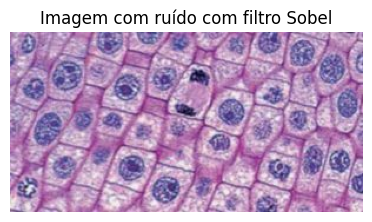

In [11]:
sem_g=sobelemimagemcolorida(imagem)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 2)
plt.title("Imagem com ruído com filtro Sobel")
plt.imshow(imagem)
plt.axis('off')

(-0.5, 299.5, 152.5, -0.5)

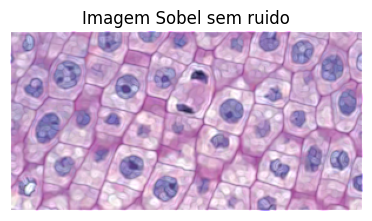

In [13]:
sobel_image=sobelemimagemcolorida(imagem_com_filtro_g)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 2)
plt.title("Imagem Sobel sem ruido")
plt.imshow(sobel_image)
plt.axis('off')

## <font color=lightgreen>Unsharp Mask Laplaciano
    
   <font color=black> Unsharp mask de Laplaciano é uma técnica de realce de imagem usada para aumentar os detalhes e o contraste. Ela funciona aplicando um filtro Laplaciano, que detecta bordas e áreas de alta variação de intensidade na imagem. Primeiramente, a imagem original é suavizada (normalmente com um filtro Gaussiano). Em seguida, o filtro Laplaciano é aplicado para detectar as bordas, subtraindo a versão suavizada da imagem original. A diferença é usada para aumentar as áreas de bordas, realçando os detalhes.

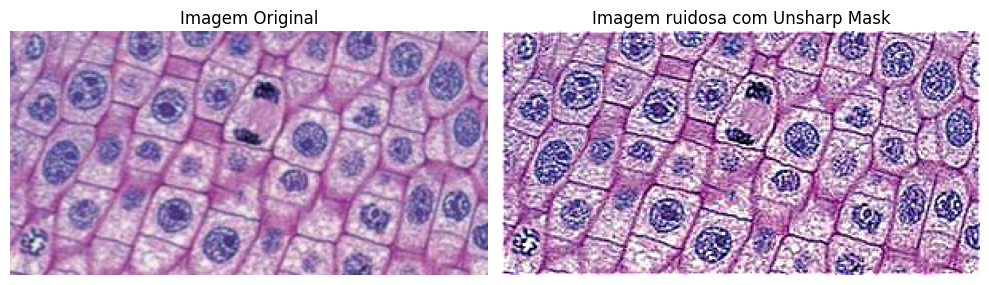

In [14]:
def unsharp_mask_laplaciano(image):
    laplaciano=np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])
    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]

    lap_r=convolve2d(r,laplaciano,boundary='fill',fillvalue=0, mode='same')
    lap_g=convolve2d(g,laplaciano,boundary='fill',fillvalue=0, mode='same')
    lap_b=convolve2d(b,laplaciano,boundary='fill',fillvalue=0, mode='same')

    r_sharpened=np.clip(r-lap_r,0,255)
    g_sharpened=np.clip(g-lap_g,0,255)
    b_sharpened=np.clip(b-lap_b,0,255)
    
    sharpened_image=np.stack((r_sharpened,g_sharpened,b_sharpened),axis=-1)

    return sharpened_image.astype(np.uint8)

sharpened_image=unsharp_mask_laplaciano(imagem)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(imagem)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagem ruidosa com Unsharp Mask")
plt.imshow(sharpened_image)
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 299.5, 152.5, -0.5)

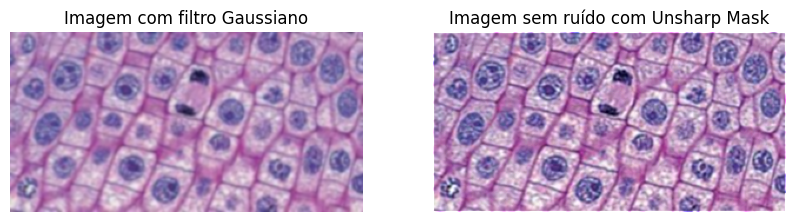

In [15]:
laplaciano_sem_ruido=unsharp_mask_laplaciano(imagem_com_filtro_g)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Imagem com filtro Gaussiano")
plt.imshow(imagem_com_filtro_g)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Imagem sem ruído com Unsharp Mask")
plt.imshow(laplaciano_sem_ruido)
plt.axis('off')


## <font color=lightgreen> Referências
TECNOLOGIA EM MARKETING DIGITAL. Arquivo PPM: Compreendendo o Formato e Suas Aplicações. Disponível em: <https://tecnologiaemmarketingdigital.com/arquivo-ppm/>. Acesso em: 31 dez. 2024.



FALCAO, A. X. Filtros Lineares. Disponível em: <https://www.ic.unicamp.br/~afalcao/mo443/slides-aula6.pdf>. Acesso em: 31 dez. 2024.


INÁCIO, D. Sobel Operator. Disponível em: <https://diegoinacio.github.io/computer-vision-notebooks-page/pages/sobel_operator.html>. Acesso em: 31 dez. 2024.

How does an unsharp mask work? Disponível em: <https://stackoverflow.com/questions/2938162/how-does-an-unsharp-mask-work>. Acesso em: 31 dez. 2024.

Unsharp masking using MATLAB. Disponível em: <https://www.geeksforgeeks.org/unsharp-masking-using-matlab/>. Acesso em: 31 dez. 2024.

   
    
https://chatgpt.com/